In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Given the following

np.random.seed(22)
data = np.random.normal(50, 10, 100)
data.mean()

49.46324599387749

### Bootstrapping

* Bootstrapping consists of sampling with replacement from observed dataset

* Basic idea: inference about a population from a sample of the population can be modeled by resampling from the sample data and performing inference on the resampled sample

* In bootstrap-resamples, the 'population' is in fact the sample



### Using Bootstrap to Estimate the Population Mean

* In the previous example, we drew 100 samples from Normal with $\mu=50$ and $\sigma=10$

* Are 100 records sufficient to obtain a good measure of the population mean using bootstrap?

* What is the population's range of possible means that can be estimated from samples of this size?
  

In [3]:
# Selecting data from a sample
# Draw to instance from the given array 
np.random.choice([1,2,3], 2)

array([3, 2])

In [4]:
bootstrap_means = []

for i in range(10000):
    returns_data_100_bootstrap = np.random.choice(data, 100)
    bootstrap_mean = returns_data_100_bootstrap.mean()
    bootstrap_means.append(bootstrap_mean)

In [5]:
np.percentile(bootstrap_means, (2.5, 97.5))

array([47.49108953, 51.3568865 ])

In [11]:
bootstrap_means = []

for i in range(10000):
    returns_data_100_bootstrap = np.random.choice(data, 1000)
    bootstrap_mean = returns_data_100_bootstrap.mean()
    bootstrap_means.append(bootstrap_mean)
np.percentile(bootstrap_means, (2.5, 97.5))

array([48.37324118, 49.63015335])

### Interpreting the Bootstrap Values

* The bootstrap data shows us the extent of sampling variability

* The 95% confidence interval contains our mean
  * Values within 95% confidence interval are not a fluke.
  * We cannot discredit the fact that any of those values are possible means of the population

* Conclusion: even with only 100 samples, we can observe that population mean is included in the interval [47.47, 50.37]



### How Confident are we in the Bootstrap Confidence Interval?

* The estimate 95% confidence interval captures the population parameter

  * Was that a fluke?

* To see how frequently the interval contains the parameter, we have to run the entire process over and over again.

* We will repeat the following process a number of time times:

  * Generate a data sample of size 100
  * Generate 10,000 bootstrap samples from the data sample
  * Generate the 95% confidence of the mean
  
* We will end up with 100 intervals, and count how many of them contain the population median.
  * How many of these 95 confidence intervals will include our mean?


In [6]:
def comput_conf_interval(data, nb_bootstrap_iters = 10_000):
    bootstrap_means = []
    for i in range(nb_bootstrap_iters):
        bootstrap_sample = np.random.choice(data, 100, replace=True)
        bootstrap_means.append(bootstrap_sample.mean())
    return np.percentile(bootstrap_means, (2.5, 97.5))
    
lower_bound = []
upper_bound = []
for i in range(100):
    data = np.random.normal(50, 10, 100)
    conf_interval = comput_conf_interval(data)
    lower_bound.append(conf_interval[0])
    upper_bound.append(conf_interval[1])


In [7]:
conf_ints_95 = pd.DataFrame({"lower": lower_bound, "upper": upper_bound})
conf_ints_95.head()

,lower,upper
0,48.857784,53.082003
1,48.448264,52.205987
2,49.248013,52.893485
3,49.127204,52.737125
4,47.576569,51.452966


In [8]:
conf_ints_95.shape

(100, 2)

In [9]:
sum((conf_ints_95["lower"] < 50) & (conf_ints_95["upper"] > 50))

97

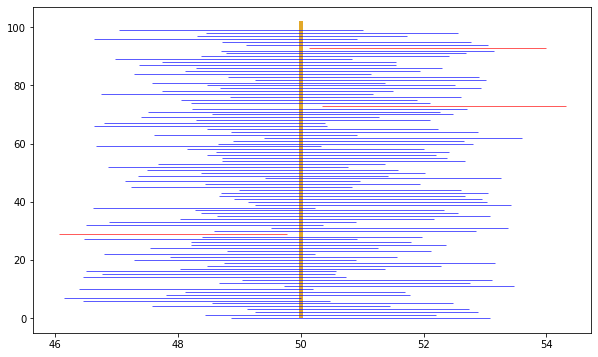

In [10]:
plt.figure(figsize=(10,6))
plt.vlines(50, 0, 102, color="#e2a829", linewidth=4)
for i in range(100):
    c = "blue"
    if lower_bound[i] > 50 or upper_bound[i] < 50:
        c = "red"
    plt.hlines(i,lower_bound[i], upper_bound[i], color=c, alpha=0.85, linewidth=0.75)
    

### How Confident are we in the Bootstrap Confidence Interval?

* If an interval doesn't cover the parameter, it's a failure 
  * There are very few of them in this case.
* Any method based on sampling has the possibility of being off. 
 * If we have a 95% confidence interval, we should expect to be wrong 5% of the time
* The beauty of methods based on random sampling is that we can quantify how often they are likely to be off


### The Bootstrap Confidence Interval

* Our interval of estimates is called a *95% confidence interval* for the parameter

* 95% is called the *confidence level* of the interval

* We say that we are *95% confident* that the process results in a good interval

### Why is the Bootstrap a Good Idea? 

* Similarity by transitivity
  *  By the law of averages, the distribution of the original sample is likely to resemble the population. 
  * So, the distributions of all the "resamples" are likely to resemble the original sample.
  * So the distributions of all the resamples are likely to resemble the population as well. 
* Treat the original sample as if it were the entire population.
* Draw from the sample at random **with** replacement 
  * The resample (bootstrap sample) should be of the same size as the original one.
    * Avoids any discrepencies that may be due to size alone.



<img src="https://www.dropbox.com/s/rk88xdjm1m7awpj/bootstrap_pic.png?dl=1" alt="drawing" style="width:950px;"/>


### Care in Using the Bootstrap ###

* The bootstrap is an elegant and powerful method to assess the accuracy of the estimate

 * The bootstrap uses a different approach to estimating the standard error


* What you need to know before using it:

  * Start with a large random sample. 

  * The Law of Averages says that this is likely to be true provided the random sample is large


* To approximate the probability distribution of a statistic, it is a good idea to replicate the resampling procedure as many times as possible.

  * 10,000, in general, is a good estimate

* The bootstrap percentile method works well for estimating the population median or mean based on a large random sample.


### When To Not Use the Bootstrap

* The bootstrap is not useful in well in the following situations.

    * The goal is to estimate the minimum or maximum value in the population, or a very low or very high percentile, or parameters that are greatly influenced by rare elements of the population.
    * The probability distribution of the statistic is not roughly bell-shaped.
      * Can withstand some skewness in the data
    * The original sample is very small, say less than 20 or 25
      * Sample is not representative of the population.
      * Bootstrap samples are not representative of samples from the population
